## Machine Learning Fashionista 1.0: Dimensionality Reduction
_Dennis Kageni, March 2020_


---



Instructions:

1. Split your dataset from the PCA pre-class work into 80% training data and 20% testing data.
2. Build a simple linear classifier using the original pixel data. There are several options that you can try including a linear SVC (http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#examples-using-sklearn-svm-linearsvc) or a logistic classifier (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression) both of which will be covered in more detail later in this course. What is your error rate on the training data? What is your error rate on your testing data?
3. Train the same linear model as in question 1, but now on the reduced representation that you created using PCA. What is your error rate on the training data? What is your error rate on your testing data?
4. Train the same linear model as in question 1, but now on the reduced representation that you created using LDA. What is your error rate on the training data? What is your error rate on your testing data?
5. Write three paragraphs, describing and interpreting your results from questions 1, 2, and 3. Make a recommendation on which classifier you would prefer, and why.

Submit your code, and results as a pdf produced from a Python Notebook. Include relevant images or plots.

In [1]:
!wget -q https://course-resources.minerva.kgi.edu/uploaded_files/mke/nA93zn/male-clothing.zip
!wget -q https://course-resources.minerva.kgi.edu/uploaded_files/mke/VL14ar/female-clothing.zip
!unzip -q male-clothing.zip
!unzip -q female-clothing.zip
!rm *.zip

In [2]:
from glob import glob
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

##### Resizing and Reshaping Images

In [3]:
#file paths
men = glob("Man's Clothing - n03746330/*.JPEG")
women = glob("Woman's Clothing - n04596852/*.JPEG")

print(f"Number of men clothing pictures: {len(men)}.")
print(f"Number of women clothing pictures: {len(women)}.")

Number of men clothing pictures: 1242.
Number of women clothing pictures: 1270.


In [4]:
def flat_to_rgb(flt,size):
    flatrgb = flt.reshape(size[0]*size[1],3)
    prergb = np.array([tuple([int(j) for j in i]) for i in flatrgb])
    rgb = prergb.reshape(size[1],size[0],3)/255
    
    return rgb

def img_to_array(filename,size):
    img = Image.open(filename)
    img = img.resize(size)
    return np.array(img).reshape(1,-1)

In [5]:
data = [
    (img_to_array(path,(200,250)),1)
        for path in men] + [
    (img_to_array(path,(200,250)),0)
        for path in women]

# pull out the features and the labels
np.random.shuffle(data)

X = np.array([feat for (feat,lab) in data]).reshape(-1,250*200*3)
y = np.array([lab for (feat,lab) in data]).reshape(-1,1)

#### 1. Split your dataset from the PCA pre-class work into 80% training data and 20% testing data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5)

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

#debug / verification:
print("X   Train N: {}, X   Test N: {}".format(len(X_train), len(X_test)))
print("Y   Train N: {}, Y   Test N: {}".format(len(y_train), len(y_test)))

X   Train N: 1256, X   Test N: 1256
Y   Train N: 1256, Y   Test N: 1256


#### 2. Build a simple linear classifier using the original pixel data. What is your error rate on the training data? What is your error rate on your testing data?

In [7]:
## LOGISTIC REGRESSION
# fitting the model
clf_log =  LogisticRegression(penalty='l2').fit(X_train, y_train.ravel())

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
# TRAIN set prediction and accuracy
print ("Logistic Regression: Training set (no reduction)")
predicted_train_log = clf_log.predict(X_train)
score_log_train = clf_log.score(X_train, y_train)
print ("\nAccuracy Score on test set: %.3f" % score_log_train)
print(metrics.confusion_matrix(y_train, predicted_train_log))
print ("\nClassification report on test set")
print(metrics.classification_report(y_train, predicted_train_log))
print ("____________________________________________________")

# TEST set prediction and accuracy
print ("\nLogistic Regression: TEST set (no reduction)")
predicted_test_log = clf_log.predict(X_test)
score_log_test = clf_log.score(X_test, y_test)
print ("Accuracy Score on test set: %.3f" % score_log_test)
print ("\nConfusion Matrix on test set: ")
print(metrics.confusion_matrix(y_test, predicted_test_log))
print ("\nClassification report on test set")
print(metrics.classification_report(y_test, predicted_test_log))

Logistic Regression: Training set (no reduction)

Accuracy Score on test set: 1.000
[[633   0]
 [  0 623]]

Classification report on test set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       633
           1       1.00      1.00      1.00       623

    accuracy                           1.00      1256
   macro avg       1.00      1.00      1.00      1256
weighted avg       1.00      1.00      1.00      1256

____________________________________________________

Logistic Regression: TEST set (no reduction)
Accuracy Score on test set: 0.626

Confusion Matrix on test set: 
[[428 209]
 [261 358]]

Classification report on test set
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       637
           1       0.63      0.58      0.60       619

    accuracy                           0.63      1256
   macro avg       0.63      0.63      0.62      1256
weighted avg       0.63      0.63   

We can see that Logistic Regression without dimensionality reduction has a 0.61 accuracy score on the test set. Although we may be tempted to rejoice that us has a 1.00 accuracy on the training set, this actually means that we are overfitting. 

#### PCA Dimensionality Reduction
##### How many components are sufficient?

In [9]:
# Perform PCA
pca_check = PCA()
pca_check.fit(X)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

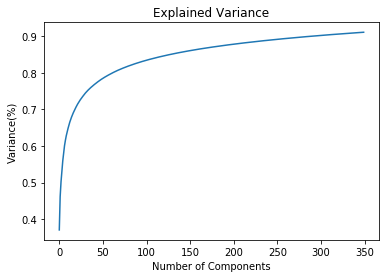

In [10]:
# Plot explained variace over n_components
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel("Variance(%)")
plt.plot(np.cumsum(pca_check.explained_variance_ratio_[:350]))
plt.show()

In [11]:
print("Variance explained by the first 300 principal components: " \
      + str(np.sum(pca_check.explained_variance_ratio_[:300])) + "%.")

Variance explained by the first 300 principal components: 0.9024540195902184%.


Since 300 components provide about 90% of the explained variance, we will train our pca model with 300 components

In [12]:
#Use randomized svd_solver to approx first N Principle Components much quicker than standard PCA
#useful for high-dimensional data
pca = PCA(n_components = 300, svd_solver='randomized').fit(X_train, y_train)
pca_components_train = pca.transform(X_train)  
print("original shape:   ", X_train.shape)
print("transformed shape:", pca_components_train.shape)

original shape:    (1256, 150000)
transformed shape: (1256, 300)


In [13]:
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

print("transformed shape:", X_pca_train.shape)

transformed shape: (1256, 300)


#### 3. Train the same linear model as in question 1, but now on the reduced representation that you created using PCA. What is your error rate on the training data? What is your error rate on your testing data?

In [15]:
lr_pca = LogisticRegression(penalty='l2').fit(X_pca_train,y_train.ravel())

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
print ("PCA: Logistic Regression")
print ("Accuracy score PCA Classifier, training set: ",lr_pca.score(X_pca_train,y_train))
print ("Accuracy score PCA Classifier, test set: ",lr_pca.score(X_pca_test,y_test))
predicted_pca_log = lr_pca.predict(X_pca_test)
print ("\nConfusion Matrix on test set: ")
print(metrics.confusion_matrix(y_test, predicted_pca_log))
print ("\nClassification report on test set")
print(metrics.classification_report(y_test, predicted_pca_log))

PCA: Logistic Regression
Accuracy score PCA Classifier, training set:  0.802547770700637
Accuracy score PCA Classifier, test set:  0.6377388535031847

Confusion Matrix on test set: 
[[412 225]
 [230 389]]

Classification report on test set
              precision    recall  f1-score   support

           0       0.64      0.65      0.64       637
           1       0.63      0.63      0.63       619

    accuracy                           0.64      1256
   macro avg       0.64      0.64      0.64      1256
weighted avg       0.64      0.64      0.64      1256



PCA Classifier Performance

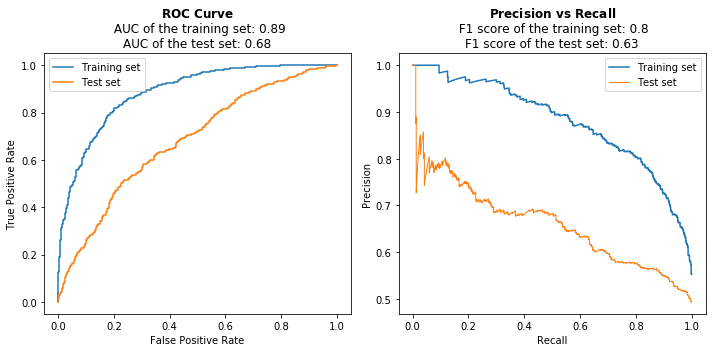

In [17]:
y_pca_probs_train = lr_pca.predict_proba(X_pca_train)[:,1]
fpr_pca_train, tpr_pca_train, thresholds_pca_train = roc_curve(y_train, y_pca_probs_train)
precision_pca_train, recall_pca_train, _pca_tr = precision_recall_curve(y_train, y_pca_probs_train)
lr_f1_pca_train = f1_score(y_train,lr_pca.predict(X_pca_train))

y_pca_probs_test = lr_pca.predict_proba(X_pca_test)[:,1]
fpr_pca_test, tpr_pca_test, thresholds_test = roc_curve(y_test, y_pca_probs_test)
precision_pca_test, recall_pca_test, _pca_test = precision_recall_curve(y_test, y_pca_probs_test)
lr_f1_pca_test = f1_score(y_test,lr_pca.predict(X_pca_test))


fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(fpr_pca_train,tpr_pca_train,label='Training set')
axes[0].plot(fpr_pca_test,tpr_pca_test,label='Test set')


axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title( r'$\bf{ROC\ Curve}$' + '\n AUC of the training set: {}\nAUC of the test set: {}'.format(round(auc(fpr_pca_train,tpr_pca_train),2),round(auc(fpr_pca_test,tpr_pca_test),2)))
axes[0].legend()

axes[1].plot(recall_pca_train,precision_pca_train,label='Training set')
axes[1].plot(recall_pca_test,precision_pca_test,label='Test set',linewidth=1)

axes[1].set_ylabel('Precision')
axes[1].set_xlabel('Recall')
axes[1].set_title( r'$\bf{Precision\ vs\ Recall}$' + '\n F1 score of the training set: {}\nF1 score of the test set: {}'.format(round(lr_f1_pca_train,2),round(lr_f1_pca_test,2)))
axes[1].legend()

plt.subplots_adjust(wspace=0.5,hspace=.25)
plt.tight_layout()

plt.show()

#### 4. Train the same linear model as in question 1, but now on the reduced representation that you created using LDA. What is your error rate on the training data? What is your error rate on your testing data?

In [19]:
# LDA has a limit of k-1 components given k classes
# since we have two classes, our n_components is thus 1
lda = LDA(n_components=1).fit(X_train, y_train.ravel())
lda_X_train = lda.transform(X_train) 
lda_X_test = lda.transform(X_test)


In [20]:
print("original shape:   ", X_train.shape)
print("transformed shape:", lda_X_train.shape)

original shape:    (1256, 150000)
transformed shape: (1256, 1)


In [22]:
#over LDA Data
print ("\nLDA: Logistic Regression")
clf_lda_log = LogisticRegression(penalty='l2')
clf_lda_log.fit(lda_X_train,y_train.ravel())
print ("Accuracy score LDA Classifier, training set: ",clf_lda_log.score(lda_X_train,y_train))
print ("Accuracy score LDA Classifier, test set: "  ,  clf_lda_log.score(lda_X_test,y_test))
predicted_lda_log = clf_lda_log.predict(lda_X_test)
print ("\nConfusion Matrix on test set: ")
print(metrics.confusion_matrix(y_test, predicted_lda_log))
print ("\nClassification report on test set")
print(metrics.classification_report(y_test, predicted_lda_log))


LDA: Logistic Regression
Accuracy score LDA Classifier, training set:  0.9156050955414012
Accuracy score LDA Classifier, test set:  0.5955414012738853

Confusion Matrix on test set: 
[[372 265]
 [243 376]]

Classification report on test set
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       637
           1       0.59      0.61      0.60       619

    accuracy                           0.60      1256
   macro avg       0.60      0.60      0.60      1256
weighted avg       0.60      0.60      0.60      1256



LDA Classifier Performance

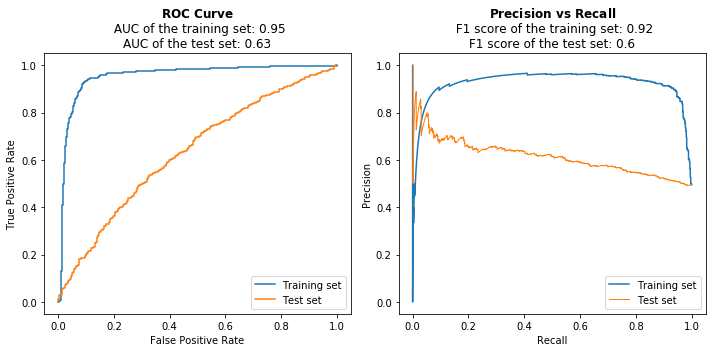

In [23]:
y_lda_probs_train = clf_lda_log.predict_proba(lda_X_train)[:,1]
fpr_lda_train, tpr_lda_train, thresholds_lda_train = roc_curve(y_train, y_lda_probs_train)
precision_lda_train, recall_lda_train, _lda_tr = precision_recall_curve(y_train, y_lda_probs_train)
lr_f1_lda_train = f1_score(y_train,clf_lda_log.predict(lda_X_train))

y_lda_probs_test = clf_lda_log.predict_proba(lda_X_test)[:,1]
fpr_lda_test, tpr_lda_test, thresholds_test = roc_curve(y_test, y_lda_probs_test)
precision_lda_test, recall_lda_test, _lda_test = precision_recall_curve(y_test, y_lda_probs_test)
lr_f1_lda_test = f1_score(y_test,clf_lda_log.predict(lda_X_test))

fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(fpr_lda_train,tpr_lda_train,label='Training set')
axes[0].plot(fpr_lda_test,tpr_lda_test,label='Test set')


axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title( r'$\bf{ROC\ Curve}$' + '\n AUC of the training set: {}\nAUC of the test set: {}'.format(round(auc(fpr_lda_train,tpr_lda_train),2),round(auc(fpr_lda_test,tpr_lda_test),2)))
axes[0].legend()

axes[1].plot(recall_lda_train,precision_lda_train,label='Training set')
axes[1].plot(recall_lda_test,precision_lda_test,label='Test set',linewidth=1)

axes[1].set_ylabel('Precision')
axes[1].set_xlabel('Recall')
axes[1].set_title( r'$\bf{Precision\ vs\ Recall}$' + '\n F1 score of the training set: {}\nF1 score of the test set: {}'.format(round(lr_f1_lda_train,2),round(lr_f1_lda_test,2)))
axes[1].legend()

plt.subplots_adjust(wspace=0.5,hspace=.25)
plt.tight_layout()

plt.show()

#### 5. Write three paragraphs, describing and interpreting your results from questions 1, 2, and 3. Make a recommendation on which classifier you would prefer, and why.

**Summary of results:**
* Original pixel dataset (150000 dimensions):
    
    * Training accuracy: 1.0
    
    * Testing accuracy: 0.61

* PCA dataset (300 dimensions):
    
    * Training accuracy: 0.76
    
    * Testing accuracy: 0.62
    
* LDA dataset (1 dimension):
    
    * Training accuracy: 0.91
    
    * Testing accuracy: 0.60
    
**Interpretation**

The results above reveal that while the models trained on the original dataset and LDA dataset have higher training accuracy scores, the LDA dataset model has a lower testing accuracy than the PCA dataset model (0.60 vs 0.62), while the original pixel dataset has a testing accuracy of 0.61. The higher training scores for both the original and LDA dataset models could be a result of overfitting. In the case of the original pixel dataset, the large amount of features (150000) could be generating a lot of unneccesary noise that interferes with the model's classification performance on the testing set. The LDA dataset has a reduced dimension of 1 component, and its model may be underperforming on the test set due to a lack of differentiability between the two classes when only 1 linear discriminant is derived.

Principal Component Analysis with 300 components reduces the F1 score and AUC of the training set while increasing the same metrics for the test set slightly. This tells us that PCA is removing essential information from the training data for its correct classification, yet the fact that the classification performance of the test set was not affected suggests that some of the lost information was specifically relevant for the classification of the training data, yet cannot be generalizable to unseen photos.

While it looks counterintuitive that LDA can perform similarly with a single component than PCA with 300 components, LDA reduces the data to a 1-dimension linear subspace that provides most separability between the classes, and it does so in a supervised way: the reduction is informed by the real labels of the data. While LDA did cause a decrease in the classification metrics for the training set, the metrics did not plummet as compared to the classification of the raw training set as with PCA. This shows that while PCA lost essential information for classification of the training set, LDA focused its reduction on keeping the training data as separable as possible.

**Recommendation**

Considering the training and test results, and the efficiency of the various methods, I would recommend using the PCA dataset model. Although it has a similar testing accuracy as the original dataset model, the dataset is more compact (300 dimensions dimensions vs 150000 dimensions) and so any cross-validation, training, and testing processes would be much more efficient.





## New markdown cell